In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.typing as npt
import matplotlib.pyplot as plt

#TODO
- fazer plot da legenda ficar sempre no canto superior esquerdo
- por titulo na legenda dizendo qual variṕavel esta avriando
- pegar chave e valor de valores fixos de forma mais elegante

In [2]:
def plot_empirical_error_convergence(loss: npt.NDArray[np.float_], nn_config: dict, not_fixed_param: str, annotate: bool = False) -> None:
    sns.set(style="darkgrid", color_codes=True, rc={"figure.figsize": (8, 5)})
    ax = sns.lineplot(data=loss, markers=True, marker="o", label=f"{nn_config[not_fixed_param]}")

    del nn_config[not_fixed_param]
    keys = list(nn_config.keys())
    vls = list(nn_config.values())

    plt.xticks(np.arange(len(loss)))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(title=not_fixed_param, fontsize=10)
    plt.title(f"Convergence of empirical error\n{keys[0]} = {vls[0]} , {keys[1]} = {vls[1]}")
    if annotate:
        for i, j in enumerate(loss):
            ax.annotate(str(np.round(j, 2)), xy=(i, j), xytext=(i, j + 0.02))

In [3]:
def plot_fixed(results: pd.DataFrame, hidden_layer_size: np.int_ = None, batch_size: np.int_ = None, learning_rate: np.float_ = None, annotate: bool = False) -> None:
    if hidden_layer_size is None and batch_size is None and learning_rate is None:
        raise "Especifique quais métricas devem ser fixadas"
    not_fixed: str = ""
    
    if hidden_layer_size and batch_size:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and batch_size == {batch_size}")[["learning_rate", "history"]]
        not_fixed = "learning_rate"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": batch_size, "learning_rate": e.learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if hidden_layer_size and learning_rate:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and learning_rate == {learning_rate}")[["batch_size", "history"]]
        not_fixed = "batch_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": e.batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if learning_rate and batch_size:
        aux: pd.DataFrame = results.query(f"batch_size == {batch_size} and learning_rate == {learning_rate}")[["hidden_layer_size", "history"]]
        not_fixed = "hidden_layer_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": e.hidden_layer_size, "batch_size": batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)

In [4]:
results: pd.DataFrame = pd.read_json("data/results.json")
results.nlargest(columns=["accuracy_score"], n=10)

,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,random_state_seed,test_size,hidden_layer_size,batch_size,learning_rate,history
28,0.930000,"[0.9307692307692301, 0.952095808383233, 0.9338...","[0.968, 0.9754601226993861, 0.9202898550724631...","[0.9490196078431371, 0.9636363636363631, 0.927...","[[121, 0, 1, 0, 0, 1, 2, 0, 0, 0], [0, 159, 0,...",42,0.3,100,20,1.0,"{'loss': [0.8681265115737911, 0.37147387862205..."
16,0.926667,"[0.9318181818181811, 0.946745562130177, 0.9402...","[0.984, 0.9815950920245391, 0.9130434782608691...","[0.957198443579766, 0.9638554216867471, 0.9264...","[[123, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 160, 0,...",42,0.3,50,20,1.0,"{'loss': [0.809752583503723, 0.363506466150283..."
27,0.926667,"[0.9318181818181811, 0.952095808383233, 0.9117...","[0.984, 0.9754601226993861, 0.898550724637681,...","[0.957198443579766, 0.9636363636363631, 0.9051...","[[123, 0, 0, 0, 0, 0, 0, 0, 2, 0], [0, 159, 0,...",42,0.3,100,20,0.5,"{'loss': [0.9357496500015251, 0.42697048187255..."
19,0.925333,"[0.9179104477611941, 0.9580838323353291, 0.947...","[0.984, 0.9815950920245391, 0.9130434782608691...","[0.949806949806949, 0.9696969696969691, 0.9298...","[[123, 0, 0, 0, 0, 0, 0, 0, 2, 0], [0, 160, 0,...",42,0.3,50,50,1.0,"{'loss': [1.071458339691162, 0.463524758815765..."
31,0.922000,"[0.9236641221374041, 0.9464285714285711, 0.892...","[0.968, 0.9754601226993861, 0.905797101449275,...","[0.9453124999999991, 0.9607250755287011, 0.899...","[[121, 0, 1, 0, 0, 0, 1, 0, 2, 0], [0, 159, 0,...",42,0.3,100,50,1.0,"{'loss': [1.2293034791946411, 0.48578581213951..."
15,0.918667,"[0.9379844961240311, 0.9464285714285711, 0.911...","[0.968, 0.9754601226993861, 0.898550724637681,...","[0.9527559055118111, 0.9607250755287011, 0.905...","[[121, 0, 0, 0, 1, 0, 1, 0, 2, 0], [0, 159, 0,...",42,0.3,50,20,0.5,"{'loss': [0.9202888011932371, 0.43570479750633..."
4,0.916000,"[0.9236641221374041, 0.952095808383233, 0.9097...","[0.968, 0.9754601226993861, 0.8768115942028981...","[0.9453124999999991, 0.9636363636363631, 0.892...","[[121, 0, 0, 0, 1, 2, 0, 0, 1, 0], [0, 159, 0,...",42,0.3,25,20,1.0,"{'loss': [0.864920258522033, 0.385822594165802..."
30,0.912667,"[0.9312977099236641, 0.935294117647058, 0.9104...","[0.976, 0.9754601226993861, 0.884057971014492,...","[0.953125, 0.9549549549549551, 0.8970588235294...","[[122, 0, 1, 0, 0, 0, 0, 0, 2, 0], [0, 159, 0,...",42,0.3,100,50,0.5,"{'loss': [1.290530323982238, 0.582665681838989..."
18,0.910667,"[0.9318181818181811, 0.9349112426035501, 0.917...","[0.984, 0.9693251533742331, 0.884057971014492,...","[0.957198443579766, 0.951807228915662, 0.90036...","[[123, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 158, 0,...",42,0.3,50,50,0.5,"{'loss': [1.311636805534362, 0.619337618350982..."
7,0.910000,"[0.9166666666666661, 0.935294117647058, 0.8661...","[0.968, 0.9754601226993861, 0.891304347826086,...","[0.9416342412451361, 0.9549549549549551, 0.878...","[[121, 0, 1, 0, 0, 2, 0, 0, 1, 0], [0, 159, 1,...",42,0.3,25,50,1.0,"{'loss': [1.160786986351013, 0.518158257007598..."


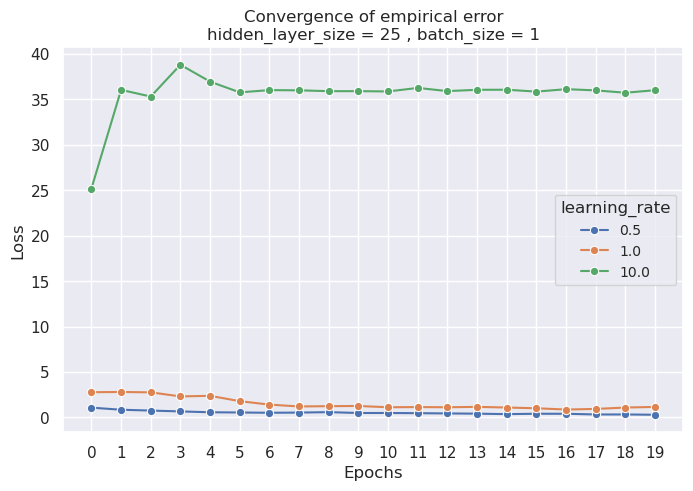

In [10]:
ex = results.iloc[0]
plot_fixed(results=results, hidden_layer_size=ex["hidden_layer_size"], batch_size=ex["batch_size"], learning_rate=None)